## **Feedback Linearization of Flexible Joint Link**
### **Dynamics of the System**
The system is the nonlinear pendulum with finite stifness in the joint :
<p><img alt="Compliant pendulum" height="200px" src="https://drive.google.com/uc?id=1HZbitkGnsV0TdRhSKoFADmQhpbeSh4uW" align="center" hspace="320px" vspace="0px"></p>

Dynamics of this system is given as:

\begin{equation}
\begin{cases} 
I \ddot{\theta}_1 +  b \dot{\theta}_1 + k(\theta_1 - \theta_2) = u \\
m L^2 \ddot{\theta}_2 + mgL \sin\theta_2 = k(\theta_1 - \theta_2) \\
\end{cases}
\end{equation}

Defining the state as $\mathbf{x} = [\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2]$, then the system above can be writen in state space form as follows:
\begin{equation}
\dot{\mathbf{x}} = 
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\ddot{\theta}_1 \\
\ddot{\theta}_2 
\end{bmatrix} 
=
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\frac{1}{I}\big(u - b \dot{\theta}_1 - k(\theta_1 - \theta_2)\big) \\ 
\frac{1}{m L^2}\big(k(\theta_1 - \theta_2) - mgL \sin \theta_2\big)
\end{bmatrix} 
\end{equation}


###**System parameters**: 
Let us choose the following parameters:

In [ ]:
# System parameters 
m = 0.5 # mass of the pendulum bob
g = 9.81 # Gravitational acceleration
L = 0.2 # Length of pendulum beam 
I = 0.01 # Inertia of actuator 
b = 0.08 # Actuator viscous friction (damping) 
k = 100 # Joint stiffness

In [ ]:
# Define system ODE: dx/dt = f(x,u)
import numpy as np
def sys_ode(x, t, gains):
    # Find control 
    if reg == 1: 
      u = control(x, gains, t=0)
    else:
      u = control(x, gains, t)
    # Define direvitive
    dx_1 = x[2] 
    dx_2 = x[3]
    ddx_1 = (1/I)*(u-b*x[2]-k*(x[0]-x[1]))
    ddx_2 = (1/(m*(L**2)))*(k*(x[0]-x[1])- m*g*L*np.sin(x[1]))
    dx = dx_1, dx_2, ddx_1, ddx_2
    return dx


Let us define the **state transformation**:
\begin{equation}
\mathbf{z} = 
 \begin{bmatrix} 
z_1 \\ 
z_2 \\ 
z_3 \\
z_4 \\
\end{bmatrix} = 
\mathbf{T}(\mathbf{\theta}) =
 \begin{bmatrix} 
{\theta}_2 \\
\dot{\theta}_2 \\
\ddot{\theta}_2 \\
\dddot{\theta}_2 \\
\end{bmatrix}
\end{equation}


In [ ]:
# Define state transformation: z = T(x)
def T(x):
    theta_1 = x[0]
    theta_2 = x[1]
    dtheta_1 = x[2]
    dtheta_2 = x[3]
    
    z_1 = theta_2
    z_2 = dtheta_2
    z_3 = ((k/(m*(L**2)))*(theta_1-theta_2))-((g/L)*np.sin(theta_2))
    z_4 = ((k/(m*(L**2)))*(dtheta_1-dtheta_2))-((g/L)*np.cos(theta_2)*dtheta_2)

    return z_1, z_2, z_3, z_4

Differentiating with respect to time yields:
\begin{equation}
\dot{\mathbf{z}} = 
 \begin{bmatrix} 
\dot{z}_1 \\
\dot{z}_2 \\
\dot{z}_3 \\
\dot{z}_4 \\ 
\end{bmatrix} = 
\begin{bmatrix} 
\dot{\theta}_2 \\
\ddot{\theta}_2 \\
\dddot{\theta}_2 \\
\ddddot{\theta}_2 \\
\end{bmatrix} = 
 \begin{bmatrix} 
\dot{\theta}_2 \\ 
\frac{k}{m L^2}({\theta}_1 - {\theta}_2) - \frac{g}{L} \sin \theta_2 \\
\frac{k}{m L^2}(\dot{\theta}_1 - \dot{\theta}_2) - \frac{g}{L} \cos (\theta_2)\dot{\theta}_2 \\
\frac{k}{m L^2}(\ddot{\theta}_1 - \ddot{\theta}_2) + \frac{g}{L} \sin (\theta_2)\dot{\theta}_2^2 - \frac{g}{L} \cos (\theta_2)\ddot{\theta}_2\\
\end{bmatrix}
\end{equation}
<br/><br/>
\begin{equation}
\dot{\mathbf{z}} = 
 \begin{bmatrix} 
\dot{\theta}_2 \\ 
\frac{k}{m L^2}({\theta}_1 - {\theta}_2) - \frac{g}{L} \sin \theta_2 \\
\frac{k}{m L^2}(\dot{\theta}_1 - \dot{\theta}_2) - \frac{g}{L} \cos (\theta_2)\dot{\theta}_2 \\
\frac{k}{m L^2}\ddot{\theta}_1 - (\frac{k}{m L^2} + \frac{g}{L} \cos \theta_2)\ddot{\theta}_2 + \frac{g}{L} \sin (\theta_2)\dot{\theta}_2^2 \\
\end{bmatrix}
\end{equation}
<br/><br/>
\begin{equation}
\dot{\mathbf{z}} = 
 \begin{bmatrix} 
\dot{\theta}_2 \\ 
\frac{k}{m L^2}({\theta}_1 - {\theta}_2) - \frac{g}{L} \sin \theta_2 \\
\frac{k}{m L^2}(\dot{\theta}_1 - \dot{\theta}_2) - \frac{g}{L} \cos (\theta_2)\dot{\theta}_2 \\
\frac{k}{m L^2 I}\big(u - b \dot{\theta}_1 - k(\theta_1 - \theta_2)\big) - (\frac{k}{m L^2} + \frac{g}{L} \cos \theta_2)\big(\frac{k}{m L^2}({\theta}_1 - {\theta}_2) - \frac{g}{L} \sin \theta_2\big) + \frac{g}{L} \sin (\theta_2)\dot{\theta}_2^2 \\
\end{bmatrix}
\end{equation}
<br/><br/>
Thus linearizing control law $u$:
\begin{equation}
u = b \dot{\theta}_1 + k(\theta_1 - \theta_2) + \frac{m L^2 I}{k}\big((\frac{k}{m L^2} + \frac{g}{L} \cos \theta_2)(\frac{k}{m L^2}({\theta}_1 - {\theta}_2) - \frac{g}{L} \sin \theta_2) - \frac{g}{L} \sin (\theta_2)\dot{\theta}_2^2 \big) +v
\end{equation}

In [ ]:
# Define inner loop controler: u(x, v)
def inner_control(x, v):
    theta_1 = x[0]
    theta_2 = x[1]
    dtheta_1 = x[2]
    dtheta_2 = x[3]

    # Nonlinear feedback 
    c1 = (m*(L**2)*I)/k
    c2 = k/(m*(L**2))
    c3 = g/L
    u = b*dtheta_1 + k*(theta_1-theta_2) + c1*((c2+ c3*np.cos(theta_2))*(c2*(theta_1-theta_2)- c3*np.sin(theta_2)) - c3*np.sin(theta_2)*(dtheta_2**2)) + v 
    return u

Controller above transform our nonlinear system to the linear with respect to $\mathbf{z}$ and $v$:

\begin{equation}
\dot{\mathbf{z}} = 
 \begin{bmatrix} 
\dot{z}_1 \\ 
\dot{z}_2 \\
\dot{z}_3 \\
\dot{z}_4 \\   
\end{bmatrix} = 
 \begin{bmatrix} 
z_2 \\
z_3 \\
z_4 \\ 
v \\ 
\end{bmatrix}
\end{equation}

Consider stabilizing problem (regulation to the origin $\mathbf{x}_d = [0,0,0,0]^T$) of the system defined above. One can easely check that coresponding transformed desired state $\mathbf{z}_d = \mathbf{T}(\mathbf{x}_d) = [0,0,0,0]^T$ therefore stabilizing controller is given by:
\begin{equation}
v = - \mathbf{k}^T \mathbf{z}
\end{equation}

In [ ]:
# Define outer loop
def control(x, gains, t):
    # Gains for linear part
    k1 = gains['k1']
    k2 = gains['k2']
    k3 = gains['k3']
    k4 = gains['k4']
    # Find state transformation 
    z = T(x)
    if t==0:
      x_d = [np.pi, np.pi, 0, 0]
    else:
      x_d = [np.pi*np.sin(4*np.pi*t), np.pi*np.sin(4*np.pi*t), 4*(np.pi**2)*np.cos(4*np.pi*t), 4*(np.pi**2)*np.cos(4*np.pi*t)]
    z_d = T(x_d) 

    # Linear part of controller 
    v = k1*(z_d[0]-z[0]) + k2*(z_d[1]-z[1]) + k3*(z_d[2]-z[2]) + k4*(z_d[3]-z[3])
    u = inner_control(x, v)
    return u


Let us simulate response of this controller:
Regulaztion 

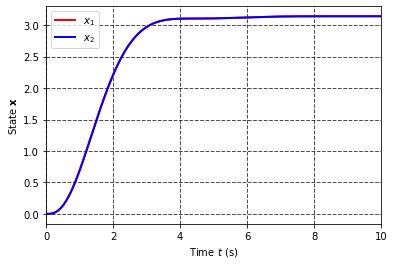

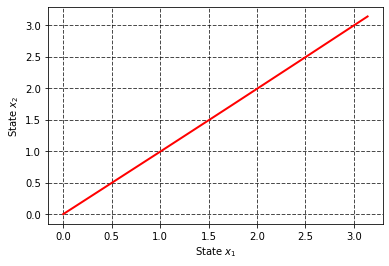

In [ ]:
from scipy.integrate import odeint
from numpy import linspace

# Initial time
t0 = 0 
# Final time 
tf = 10 
# Numbers of points in time span
N = 1E3 
# Create time span
t = linspace(t0, tf, int(N))
# Set initial state
theta1_0 =  0
theta2_0 =  0
dtheta1_0 = 0
dtheta2_0 = 0
x0 = [theta1_0, theta2_0, dtheta1_0, dtheta2_0]

# Set feedback gains
gains = {'k1':15,
         'k2':25,
         'k3':15,
         'k4':5}

# Integrate system "sys_ode" from initial state $x0$
reg = 1
x = odeint(sys_ode, x0, t, args=(gains,)) 
# Set x_1, x_2 to be a respective solution of system states
x_1, x_2 = x[:,0], x[:,1] 

from matplotlib.pyplot import *
plot(t, x_1, 'r', linewidth=2.0, label = r'$x_1$')
plot(t, x_2, 'b', linewidth=2.0, label = r'$x_2$')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
xlim([t0, tf])
ylabel(r'State $\mathbf{x}$')
xlabel(r'Time $t$ (s)')
show()

plot(x_1, x_2, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'State $x_1$')
ylabel(r'State $x_2$')
show()

Tracking


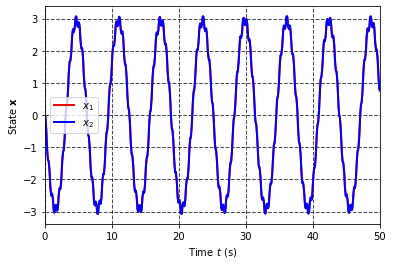

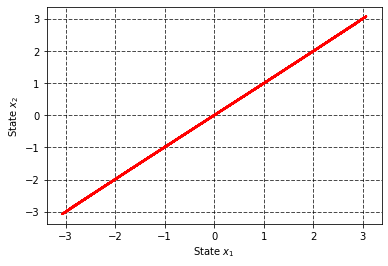

In [ ]:
# Initial time
t0 = 0 
# Final time 
tf = 50 
# Numbers of points in time span
N = 1E3 
# Create time span
t = linspace(t0, tf, int(N))

# Set feedback gains
gains = {'k1':20,
         'k2':20,
         'k3':20,
         'k4':20}

reg = 0
x = odeint(sys_ode, x0, t, args=(gains,)) 
# Set x_1, x_2 to be a respective solution of system states
x_1, x_2 = x[:,0], x[:,1] 

from matplotlib.pyplot import *
plot(t, x_1, 'r', linewidth=2.0, label = r'$x_1$')
plot(t, x_2, 'b', linewidth=2.0, label = r'$x_2$')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
xlim([t0, tf])
ylabel(r'State $\mathbf{x}$')
xlabel(r'Time $t$ (s)')
show()

plot(x_1, x_2, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'State $x_1$')
ylabel(r'State $x_2$')
show()